In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras

In [ ]:
import os
print(os.path.exists("D:/CA-Makeen/week9/DLfiles/AirQualityUCI.xlsx"))

True


In [24]:
DF = pd.read_excel("D:/CA-Makeen/week9/DLfiles/AirQualityUCI.xlsx", engine='openpyxl')


In [26]:
DF.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
df = DF.iloc[:, :-2]

df = df.replace(-200, np.nan)
df = df.dropna()

df = df.select_dtypes(include=[np.number])

In [30]:
target = 'C6H6(GT)'
X = df.drop(columns=[target])
y = df[target]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
len(df.columns)

11

In [33]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu',input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

d:\CA-Makeen\week9\learning_regression\my_virtual_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
print(11*64) #why it didn't add the output?
print((64*32)+32)
print((32*1)+1)

704
2080
33


In [50]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs = 5,
                    batch_size=2,
                    verbose = 1)

Epoch 1/5
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1038 - mae: 0.2119 - val_loss: 0.0844 - val_mae: 0.2162
Epoch 2/5
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1333 - mae: 0.2418 - val_loss: 0.0805 - val_mae: 0.2142
Epoch 3/5
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1259 - mae: 0.2499 - val_loss: 0.2293 - val_mae: 0.3666
Epoch 4/5
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1302 - mae: 0.2435 - val_loss: 0.0596 - val_mae: 0.1729
Epoch 5/5
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0990 - mae: 0.1948 - val_loss: 0.0666 - val_mae: 0.1770


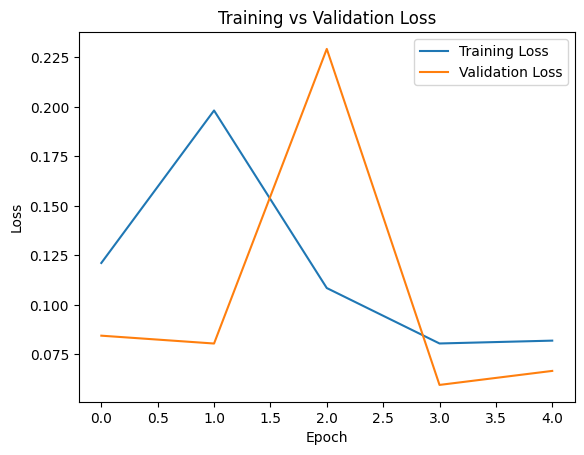

In [56]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [57]:
test_loss = model.evaluate(X_test_scaled, y_test, verbose=1)
print("Test Loss:", test_loss)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0843 - mae: 0.2011 
Test Loss: [0.09681657701730728, 0.20787441730499268]


In [58]:
y_pred = model.predict(X_test_scaled)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


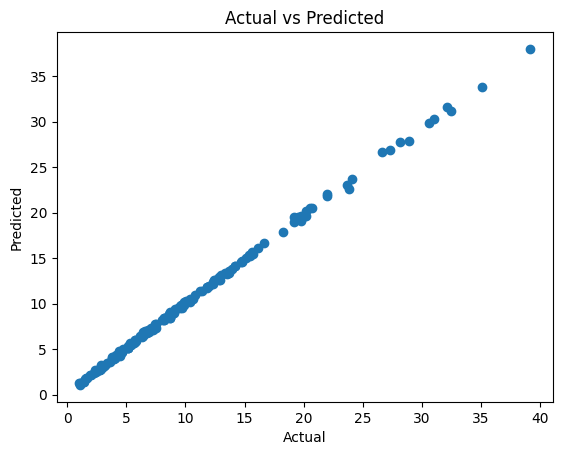

In [60]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()
